In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.models import Model
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import regularizers
from keras import initializers
import tensorflow_addons as tfa
from keras import optimizers
from keras import layers,models
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization, ReLU, GlobalAveragePooling2D 
from keras.callbacks import ReduceLROnPlateau
import h5py
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.models import load_model

In [2]:
# Set batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (299, 299)
CLASSES = ['real', 'fake']

train_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)
traindata = train_data.flow_from_directory(directory="C:/Users/labca/Documents/Dissertation - Fake News/images/train",\
                                           target_size=IMG_SIZE, batch_size = BATCH_SIZE, class_mode='binary',
                                           seed=214)

val_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)
valdata = val_data.flow_from_directory(directory="C:/Users/labca/Documents/Dissertation - Fake News/images/val",\
                                       target_size=IMG_SIZE, batch_size = BATCH_SIZE, class_mode='binary',
                                      seed=214)

test_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)
testdata = test_data.flow_from_directory(directory="C:/Users/labca/Documents/Dissertation - Fake News/images/test",\
                                         target_size=IMG_SIZE, batch_size = BATCH_SIZE, class_mode='binary',
                                        seed=214, shuffle=False)

Found 10420 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.


In [3]:
imgs, labels = next(traindata)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

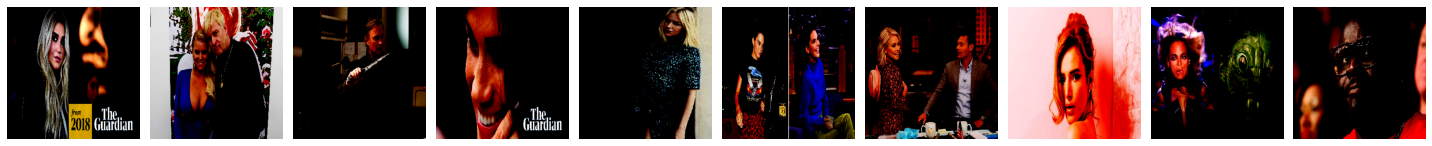

[1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1.]


In [4]:
plotImages(imgs)
print(labels)

In [5]:
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = xception_model.get_layer('block14_sepconv2_act').output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.1),\
                kernel_initializer=initializers.he_normal(seed=0))(x)
x = Dropout(0.4)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=xception_model.input, outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [6]:
for layer in xception_model.layers:
    layer.trainable = False

In [9]:
n_steps = traindata.samples // BATCH_SIZE
n_val_steps = valdata.samples // BATCH_SIZE

adam = optimizers.Adam(learning_rate=1e-4)
adam1 = optimizers.Adam(learning_rate=1e-5)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=3, verbose=1, mode='min', min_lr=1e-8)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, mode = 'min')
checkpoint = ModelCheckpoint(filepath='xception_pretrain_wgradual_lastconv2.hdf5', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)
checkpoint1 = ModelCheckpoint(filepath='xception_gradual_finetune_block12.hdf5', monitor= 'val_loss', mode= 'min', save_best_only = True, verbose= 1)

In [10]:
train_acc = []
val_acc = []
train_loss = []
val_loss = []

model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=adam, metrics=[keras.metrics.BinaryAccuracy()])
history_img = model.fit(traindata, validation_data=valdata, batch_size=32,epochs=5,
                                 steps_per_epoch=n_steps, validation_steps=n_val_steps,
                            callbacks=[lr_reduce, earlystop, checkpoint], verbose=1, shuffle=True)
train_acc.append(history_img.history['binary_accuracy'])
val_acc.append(history_img.history['val_binary_accuracy'])
train_loss.append(history_img.history['loss'])
val_loss.append(history_img.history['val_loss'])

Epoch 1/5
  6/325 [..............................] - ETA: 11:29 - loss: 398.7823 - binary_accuracy: 0.7604

C:\Users\labca\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


325/325 [==============================] - ETA: 0s - loss: 192.0331 - binary_accuracy: 0.7753
Epoch 1: val_loss improved from inf to 70.16042, saving model to xception_pretrain_wgradual_lastconv2.hdf5
325/325 [==============================] - 829s 3s/step - loss: 192.0331 - binary_accuracy: 0.7753 - val_loss: 70.1604 - val_binary_accuracy: 0.7766 - lr: 1.0000e-04
Epoch 2/5
325/325 [==============================] - ETA: 0s - loss: 32.0136 - binary_accuracy: 0.7763
Epoch 2: val_loss improved from 70.16042 to 10.55485, saving model to xception_pretrain_wgradual_lastconv2.hdf5
325/325 [==============================] - 832s 3s/step - loss: 32.0136 - binary_accuracy: 0.7763 - val_loss: 10.5548 - val_binary_accuracy: 0.7766 - lr: 1.0000e-04
Epoch 3/5
325/325 [==============================] - ETA: 0s - loss: 4.6459 - binary_accuracy: 0.7760
Epoch 3: val_loss improved from 10.55485 to 1.58801, saving model to xception_pretrain_wgradual_lastconv2.hdf5
325/325 [==============================]

In [11]:
for layer in model.layers[:106]:
    layer.trainable = False

for layer in model.layers[106:]:
    layer.trainable = True
    
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv1_bn False
3 block1_conv1_act False
4 block1_conv2 False
5 block1_conv2_bn False
6 block1_conv2_act False
7 block2_sepconv1 False
8 block2_sepconv1_bn False
9 block2_sepconv2_act False
10 block2_sepconv2 False
11 block2_sepconv2_bn False
12 conv2d False
13 block2_pool False
14 batch_normalization False
15 add False
16 block3_sepconv1_act False
17 block3_sepconv1 False
18 block3_sepconv1_bn False
19 block3_sepconv2_act False
20 block3_sepconv2 False
21 block3_sepconv2_bn False
22 conv2d_1 False
23 block3_pool False
24 batch_normalization_1 False
25 add_1 False
26 block4_sepconv1_act False
27 block4_sepconv1 False
28 block4_sepconv1_bn False
29 block4_sepconv2_act False
30 block4_sepconv2 False
31 block4_sepconv2_bn False
32 conv2d_2 False
33 block4_pool False
34 batch_normalization_2 False
35 add_2 False
36 block5_sepconv1_act False
37 block5_sepconv1 False
38 block5_sepconv1_bn False
39 block5_sepconv2_act False
40 block5_sepconv2 False

In [12]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizers.Adam(learning_rate=1e-5), metrics=[keras.metrics.BinaryAccuracy()])
history_img1 = model.fit(traindata, validation_data=valdata, batch_size=32,epochs=10,
                                 steps_per_epoch=n_steps, validation_steps=n_val_steps,
                            callbacks=[lr_reduce, earlystop, checkpoint1], verbose=1, shuffle=True)

Epoch 1/10
325/325 [==============================] - ETA: 0s - loss: 0.5325 - binary_accuracy: 0.7761
Epoch 1: val_loss improved from inf to 0.52768, saving model to xception_gradual_finetune_block12.hdf5
325/325 [==============================] - 1189s 4s/step - loss: 0.5325 - binary_accuracy: 0.7761 - val_loss: 0.5277 - val_binary_accuracy: 0.7766 - lr: 1.0000e-05
Epoch 2/10
325/325 [==============================] - ETA: 0s - loss: 0.5145 - binary_accuracy: 0.7760
Epoch 2: val_loss improved from 0.52768 to 0.52197, saving model to xception_gradual_finetune_block12.hdf5
325/325 [==============================] - 1187s 4s/step - loss: 0.5145 - binary_accuracy: 0.7760 - val_loss: 0.5220 - val_binary_accuracy: 0.7773 - lr: 1.0000e-05
Epoch 3/10
325/325 [==============================] - ETA: 0s - loss: 0.5035 - binary_accuracy: 0.7763
Epoch 3: val_loss improved from 0.52197 to 0.52086, saving model to xception_gradual_finetune_block12.hdf5
325/325 [==============================] - 119

In [13]:
train_acc.append(history_img1.history['binary_accuracy'])
val_acc.append(history_img1.history['val_binary_accuracy'])
train_loss.append(history_img1.history['loss'])
val_loss.append(history_img1.history['val_loss'])

In [14]:
train_loss_plot = [item for sublist in train_loss for item in sublist]
val_loss_plot = [item for sublist in val_loss for item in sublist]

In [16]:
model.save("C:/Users/labca/Documents/Dissertation - Fake News/Embeddings/xception_block12_tuned.hdf5")

In [ ]:
model = load_model("C:/Users/labca/Documents/Dissertation - Fake News/Embeddings/xception_block13_tuned.hdf5")

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [18]:
def plot_loss(train_loss_consol, val_loss_consol):
    plt.plot(train_loss_consol)
    plt.plot(val_loss_consol)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

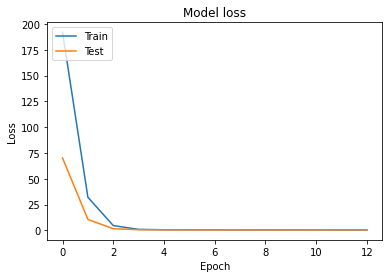

In [19]:
model_img_plotloss = plot_loss(train_loss_plot, val_loss_plot)

In [20]:
transfer_model= Model(inputs=model.input, outputs=model.layers[-4].output)
transfer_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [21]:
for layer in transfer_model.layers:
    layer.trainable = False

In [22]:
df_goss_raw = pd.read_csv("df_gosscop.csv")

In [23]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
import torch
from datasets import load_dataset
import re

In [24]:
df_goss_raw.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,title,filtered_img2,label,dataset,text_combined,clean_text_combined,idx
0,0,0,0,"Those heels were cute, but they didn't last lo...",Selena Gomez Goes Barefoot On The Street After...,https://web.archive.org/web/20180705092151im_/...,0,1,Selena Gomez Goes Barefoot On The Street After...,Selena Gomez Goes Barefoot On The Street After...,0
1,1,2,2,Play video content TMZ.com\n\nJessica Simpson ...,Jessica Simpson Stumbles Out of Hubby's Birthd...,https://imagez.tmz.com/image/44/16by9/2017/09/...,0,1,Jessica Simpson Stumbles Out of Hubby's Birthd...,Jessica Simpson Stumbles Out of Hubby's Birthd...,2
2,2,3,3,After years of rapping about food (most famous...,Kanye West Is Reportedly Opening a Restaurant ...,https://imgix.bustle.com/wmag/2018/07/18/5b4fb...,0,1,Kanye West Is Reportedly Opening a Restaurant ...,Kanye West Is Reportedly Opening a Restaurant ...,3
3,3,5,5,It’s that time of the week again when the cele...,Is Kanye West Heading to Rehab?,https://web.archive.org/web/20170304210340im_/...,0,1,Is Kanye West Heading to Rehab? It’s that time...,Is Kanye West Heading to Rehab? It’s that time...,5
4,4,6,6,"Kate Middleton and her husband Prince William,...",Pregnant Kate Middleton Hit With Cocaine Bombs...,https://media.radaronline.com/brand-img/JuVUVy...,0,1,Pregnant Kate Middleton Hit With Cocaine Bombs...,Pregnant Kate Middleton Hit With Cocaine Bombs...,6


In [25]:
df_goss_raw['img_path'] = df_goss_raw['idx'].apply(lambda x:str(x)+'.jpg')
df = df_goss_raw[['Unnamed: 0','img_path','label']]
df

,Unnamed: 0,img_path,label
0,0,0.jpg,0
1,1,2.jpg,0
2,2,3.jpg,0
3,3,5.jpg,0
4,4,6.jpg,0
...,...,...,...
13021,13269,15478.jpg,1
13022,13270,15479.jpg,1
13023,13271,15480.jpg,1
13024,13272,15481.jpg,1


In [26]:
ratio_train = 0.8
ratio_val = 0.1
ratio_test = 0.1

# Produces test split.
remaining, test = train_test_split(df, test_size=ratio_test, random_state=214)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
train, val, = train_test_split(remaining, test_size=ratio_val_adjusted, random_state=214)

In [27]:
train = train.rename(columns={'Unnamed: 0': 'idx'})
val = val.rename(columns={'Unnamed: 0': 'idx'})
test = test.rename(columns={'Unnamed: 0': 'idx'})

In [28]:
train.head()

,idx,img_path,label
1902,1934,2449.jpg,0
1386,1408,1827.jpg,0
2539,2589,3222.jpg,0
5649,5778,6901.jpg,1
2869,2922,3597.jpg,0


In [29]:
def extract_features(batch, model):
    path = 'C:/Users/labca/Documents/Dissertation - Fake News/images/gosscop_img/'+str(batch)
    img = image.load_img(path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    features = model.predict(x)
    return features

In [30]:
train['img_features'] =  train['img_path'].apply(lambda x:extract_features(x,transfer_model))

1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 101ms/step


C:\Users\labca\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


In [31]:
val['img_features'] =  val['img_path'].apply(lambda x:extract_features(x,transfer_model))
test['img_features'] =  test['img_path'].apply(lambda x:extract_features(x,transfer_model))

1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 108ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 103ms/step


In [32]:
df_train = pd.DataFrame(train, columns=['img_features','label','idx'])
df_val = pd.DataFrame(val, columns=['img_features','label','idx'])
df_test = pd.DataFrame(test, columns=['img_features','label','idx'])

In [33]:
df_train.head()

,img_features,label,idx
1902,"[[0.12345049, 0.103692524, 0.10679071, 0.11953...",0,1934
1386,"[[0.025142414, 0.11223217, 0.02097135, 6.14750...",0,1408
2539,"[[0.027030187, 0.10288904, 0.30019975, 0.05462...",0,2589
5649,"[[0.37826172, 0.4675789, 0.15682955, 0.2555534...",1,5778
2869,"[[0.0014517182, 0.034252882, 0.012506969, 0.04...",0,2922


In [34]:
df_train.to_pickle('C:/Users/labca/Documents/Dissertation - Fake News/Embeddings/df_train_xception_block12_tuned.pkl')
df_val.to_pickle('C:/Users/labca/Documents/Dissertation - Fake News/Embeddings/df_val_xception_block12_tuned.pkl')
df_test.to_pickle('C:/Users/labca/Documents/Dissertation - Fake News/Embeddings/df_test_xception_block12_tuned.pkl')